In [2]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
from scipy import ndimage
from scipy import misc

%matplotlib inline

In [ ]:
def rgb_to_gray(img):
#     im = np.zeros((img.shape[0], img.shape[1]))
    im = 0.299* img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    return im

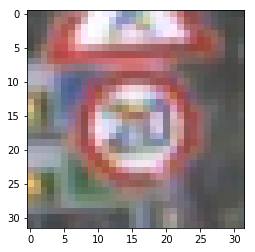

In [3]:
img = io.imread('img.png')
# img = misc.imresize(img, (32, 32))
i1 = np.asarray(img[:,:,0], dtype='float')
plt.imshow(img)
extract_hog(img)

In [ ]:
image = img
if image.ndim > 2:
        i1y, i1x = [np.ascontiguousarray(g, dtype=np.double)
              for g in np.gradient(image[:,:,0])]
        i2y, i2x = [np.ascontiguousarray(g, dtype=np.double)
              for g in np.gradient(image[:,:,1])]
        i3y, i3x = [np.ascontiguousarray(g, dtype=np.double)
              for g in np.gradient(image[:,:,2])]
        print(np.sum(i1y**2 + i1x**2), np.sum(i2y**2 + i2x**2), np.sum(i3y**2 + i3x**2))
        G = max(np.sum(i1y**2 + i1x**2), np.sum(i2y**2 + i2x**2), np.sum(i3y**2 + i3x**2))

In [14]:
image = io.imread('img.png')
image = misc.imresize(image, (32, 32))
d = extract_hog(image)

bef [[ 111.80140949   63.43494882   23.19859051 ...,  154.02560604
   127.87498365   94.39870535]
 [ 101.30993247   66.80140949   43.69804733 ...,  175.36453657  105.9453959
    75.06858282]
 [ -62.35402464    7.12501635   29.67848993 ..., -145.0079798   -62.52556837
   -41.42366563]
 ..., 
 [ -94.76364169 -119.19748605 -128.48019825 ...,   64.98310652
    66.99112992   70.01689348]
 [ -82.96205924 -101.82148834 -122.97772331 ...,    3.9909131   -74.0546041
  -100.0079798 ]
 [ -29.40718906 -129.80557109 -173.90413846 ...,  -35.21759297
  -113.19859051 -102.52880771]]
aft [[ 111.80140949   63.43494882   23.19859051 ...,  154.02560604
   127.87498365   94.39870535]
 [ 101.30993247   66.80140949   43.69804733 ...,  175.36453657  105.9453959
    75.06858282]
 [ 117.64597536    7.12501635   29.67848993 ...,   34.9920202   117.47443163
   138.57633437]
 ..., 
 [  85.23635831   60.80251395   51.51980175 ...,   64.98310652
    66.99112992   70.01689348]
 [  97.03794076   78.17851166   57.02227

In [ ]:
35 // 20


In [20]:
def extract_hog(image):
    image = misc.imresize(image, (32, 32)).astype('float')
    if image.ndim > 2:
        i1y, i1x = [np.ascontiguousarray(g, dtype=np.double)
              for g in np.gradient(image[:,:,0])]
        i2y, i2x = [np.ascontiguousarray(g, dtype=np.double)
              for g in np.gradient(image[:,:,1])]
        i3y, i3x = [np.ascontiguousarray(g, dtype=np.double)
              for g in np.gradient(image[:,:,2])]
        num = np.argmax([np.sum(i1y**2 + i1x**2), np.sum(i2y**2 + i2x**2), np.sum(i3y**2 + i3x**2)])
        image = image[:,:, num]
#     ix = ndimage.filters.convolve(image, np.array([[-1, 0, 1]]))
#     iy = ndimage.filters.convolve(image, np.transpose([[-1, 0, 1]]))
    ix = ndimage.sobel(image, axis = 1)
    iy = ndimage.sobel(image, axis = 0)
#     iy, ix = [np.ascontiguousarray(g, dtype=np.double)
#               for g in np.gradient(image)]
    G = (ix**2 + iy**2)**0.5
    theta = (np.rad2deg(np.arctan2(iy, ix))) % 180
    n_bins = 9
    r_bins = 180 / n_bins
    H = np.zeros((4, 4, n_bins))
    for i in range(4):
        for j in range(4):
            magn = G[8*i : (8*i + 8), 8*j : (8*j + 8)]
            orient = theta[8*i : (8*i + 8), 8*j : (8*j + 8)]
    #         print(orient.shape)
            hist = np.zeros(n_bins)
            for y in range(orient.shape[0]):
                for x in range(orient.shape[1]):
#                     k = int(orient[y, x] // r_bins)
                    d, m = divmod(orient[y, x], r_bins)
                    if m == 0.0:
                        k = int(d-1)
                    else:
                        k = int(d)
                    hist[k] += magn[y, x]
#                     fract = (orient[y, x] - k*r_bins) / r_bins
#                         hist[1] += (1 - fract) * magn[y, x]
#                     else:
#                         hist[k] += fract * magn[y, x]
#                         if k == (n_bins - 1):
#                             hist[0] += (1 - fract) * magn[y, x]
#                         else:
#                             hist[k+1] += (1 - fract) * magn[y, x]
    #         print(cell)
    #         print(orient)
    #         print(hist)
            H[i, j, :] = hist/ 16.
    n_block = 2
    eps = 0.00001
    V = np.array([])
    for i in range(0, 3, 1):
        for j in range(0, 3, 1):
    #         print(H[i, j, :].shape, H[i, j + 1, :].shape, H [i + 1, j, :].shape, H[i + 1, j + 1, :].shape)
            vec = np.concatenate((H[i, j, :], H[i, j + 1, :], H [i + 1, j, :], H[i + 1, j + 1, :]), axis=0)
            vec = vec / ((np.sum(vec**2) + eps)**0.5)
            V = np.append(V, vec)
#     print(V)
    return V

In [ ]:
ix = ndimage.sobel(i1, axis = 1)
iy = ndimage.sobel(i1, axis = 0)
plt.imshow(iy, cmap='gray')

In [ ]:
ix = ndimage.filters.convolve(i1, np.array([[-1, 0, 1]]))
plt.imshow(ix, cmap='gray')
print(np.array([[-1, 0, 1]]).shape)

In [ ]:
iy = ndimage.filters.convolve(i1, np.transpose([[-1, 0, 1]]))
plt.imshow(iy, cmap='gray')
print(iy.shape)

In [ ]:
iy, ix = [np.ascontiguousarray(g, dtype=np.double)
              for g in np.gradient(i1)]

In [ ]:
G = (ix**2 + iy**2)**0.5
theta = abs(np.arctan2(iy, ix))
t = theta*180/np.pi
plt.imshow(np.asarray(G, dtype='int'), cmap='gray')

In [4]:
def extract_hog(image):
    image = misc.imresize(image, (32, 32)).astype('float')
    if image.ndim > 2:
        i1y, i1x = [np.ascontiguousarray(g, dtype=np.double)
              for g in np.gradient(image[:,:,0])]
        i2y, i2x = [np.ascontiguousarray(g, dtype=np.double)
              for g in np.gradient(image[:,:,1])]
        i3y, i3x = [np.ascontiguousarray(g, dtype=np.double)
              for g in np.gradient(image[:,:,2])]
        num = np.argmax([np.sum(i1y**2 + i1x**2), np.sum(i2y**2 + i2x**2), np.sum(i3y**2 + i3x**2)])
        image = image[:,:, num]
#     ix = ndimage.filters.convolve(image, np.array([[-1, 0, 1]]))
#     iy = ndimage.filters.convolve(image, np.transpose([[-1, 0, 1]]))
    ix = ndimage.sobel(image, axis = 1)
    iy = ndimage.sobel(image, axis = 0)
#     iy, ix = [np.ascontiguousarray(g, dtype=np.double)
#               for g in np.gradient(image)]
    G = (ix**2 + iy**2)**0.5
    theta = (np.rad2deg(np.arctan2(iy, ix))) % 180
    n_bins = 9
    r_bins = np.pi / n_bins
    H = np.zeros((4, 4, n_bins))
    for i in range(4):
        for j in range(4):
            magn = G[8*i : (8*i + 8), 8*j : (8*j + 8)]
            orient = theta[8*i : (8*i + 8), 8*j : (8*j + 8)]
    #         print(orient.shape)
            hist = np.zeros(n_bins)
            for y in range(orient.shape[0]):
                for x in range(orient.shape[1]):
                    k = int(orient[y, x] // r_bins)
                    fract = (orient[y, x] - k*r_bins) / r_bins
                    if k == n_bins:
                        hist[0] += fract * magn[y, x]
                        hist[1] += (1 - fract) * magn[y, x]
                    else:
                        hist[k] += fract * magn[y, x]
                        if k == (n_bins - 1):
                            hist[0] += (1 - fract) * magn[y, x]
                        else:
                            hist[k+1] += (1 - fract) * magn[y, x]
    #         print(cell)
    #         print(orient)
    #         print(hist)
            H[i, j, :] = hist
    n_block = 2
    eps = 0.00001
    V = np.array([])
    for i in range(0, 3, 1):
        for j in range(0, 3, 1):
    #         print(H[i, j, :].shape, H[i, j + 1, :].shape, H [i + 1, j, :].shape, H[i + 1, j + 1, :].shape)
            vec = np.concatenate((H[i, j, :], H[i, j + 1, :], H [i + 1, j, :], H[i + 1, j + 1, :]), axis=0)
            vec = vec / ((np.sum(vec**2) + eps)**0.5)
            V = np.append(V, vec)
    return V

In [24]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
def fit_and_classify(train_features, train_labels, test_features):
    clf = svm.LinearSVC()
#     clf.fit(train_features, train_labels)  
#     SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)
    scores = cross_val_score(clf, train_features, train_labels, cv=5)
#     #	X_train, X_test, y_train, y_test = cross_validation.train_test_split( \
# #		train_features, train_labels, test_size=0.2, random_state=0)


# 	clf = svm.SVC(kernel='rbf', C=35, gamma=7).fit(train_features, train_labels)
# #	print clf.score(X_test, y_test)
#     return clf.predict(test_features)
    return np.mean(scores)

In [25]:
from os import environ
from os.path import join
from sys import argv


def check_test(output_dir, gt_dir):
    with open(join(output_dir, 'output.csv')) as fout:
        lines = fout.readlines()
        output = {}
        for line in lines:
            filename, class_id = line.rstrip('\n').split(',')
            output[filename] = class_id

    with open(join(gt_dir, 'gt.csv')) as fgt:
        next(fgt)
        lines = fgt.readlines()
        gt = {}
        for line in lines:
            filename, class_id = line.rstrip('\n').split(',')
            gt[filename] = class_id

    correct = 0
    total = len(gt)
    for k, v in gt.items():
        if output[k] == v:
            correct += 1

    accuracy = correct / total

    return 'Ok, accuracy %.4f' % accuracy


def grade(results_list):
    test_data_result = results_list[-1]

    result = test_data_result['result']
    if not result.startswith('Ok'):
        return '', 0

    accuracy_str = result[13:]
    accuracy = float(accuracy_str)

    if accuracy >= 0.93:
        mark = 10
    elif accuracy >= 0.90:
        mark = 8
    elif accuracy >= 0.85:
        mark = 6
    elif accuracy >= 0.80:
        mark = 4
    elif accuracy >= 0.75:
        mark = 2
    elif accuracy > 0:
        mark = 1
    else:
        mark = 0

    return accuracy_str, mark


def run_single_test(data_dir, output_dir):
#     from fit_and_classify import fit_and_classify, extract_hog
    from glob import glob
    from numpy import zeros
    from os.path import basename, join
    from skimage.io import imread

    train_dir = join(data_dir, 'train')
    test_dir = join(data_dir, 'test')

    def read_gt(gt_dir):
        fgt = open(join(gt_dir, 'gt.csv'))
        next(fgt)
        lines = fgt.readlines()

        filenames = []
        labels = zeros(len(lines))
        for i, line in enumerate(lines):
            filename, label = line.rstrip('\n').split(',')
            filenames.append(filename)
            labels[i] = int(label)

        return filenames, labels

    def extract_features(path, filenames):
        hog_length = len(extract_hog(imread(join(path, filenames[0]))))
        data = zeros((len(filenames), hog_length))
        for i in range(0, len(filenames)):
            filename = join(path, filenames[i])
            data[i, :] = extract_hog(imread(filename))
        return data

    train_filenames, train_labels = read_gt(train_dir)
    test_filenames = []
    for path in sorted(glob(join(test_dir, '*png'))):
        test_filenames.append(basename(path))

    train_features = extract_features(train_dir, train_filenames)
    test_features = extract_features(test_dir, test_filenames)

    y = fit_and_classify(train_features, train_labels, test_features)

    with open(join(output_dir, 'output.csv'), 'w') as fout:
        for i, filename in enumerate(test_filenames):
            print('%s,%d' % (filename, y[i]), file=fout)


# if __name__ == '__main__':
#     if environ.get('CHECKER'):
#         # Script is running in testing system, run on single input
#         if len(argv) != 3:
#             print('Usage: %s data_dir output_dir' % argv[0])
#             exit(0)

#         run_single_test(argv[1], argv[2])
#     else:
#         # Script is running locally, run on dir with tests
#         if len(argv) != 2:
#             print('Usage: %s tests_dir' % argv[0])
#             exit(0)

#         from glob import glob
#         from re import sub
#         from time import time
#         from traceback import format_exc
#         from os import makedirs

#         tests_dir = argv[1]

#         results = []
#         for input_dir in sorted(glob(join(tests_dir, '[0-9][0-9]_input'))):
#             output_dir = sub('input$', 'output', input_dir)
#             makedirs(output_dir, exist_ok=True)
#             gt_dir = sub('input$', 'gt', input_dir)

#             try:
#                 start = time()
#                 run_single_test(input_dir, output_dir)
#                 end = time()
#                 running_time = end - start
#             except:
#                 result = 'Runtime error'
#                 traceback = format_exc()
#             else:
#                 try:
#                     result = check_test(output_dir, gt_dir)
#                 except:
#                     result = 'Checker error'
#                     traceback = format_exc()

#             test_num = input_dir[-8:-6]
#             if result == 'Runtime error' or result == 'Checker error':
#                 print(test_num, result, '\n', traceback)
#                 results.append({'result': result})
#             else:
#                 print(test_num, '%.2fs' % running_time, result)
#                 results.append({
#                     'time': running_time,
#                     'result': result})

#         description, mark = grade(results)
#         print('Mark:', mark, description)

In [26]:
from time import time
import os
from os.path import join
input_dir = ''.join(['/Users/anoshin_alexey/Desktop/ComputerVision/public_data/00_input/'])
output_dir = ''.join(['/Users/anoshin_alexey/Desktop/ComputerVision/public_data/00_output/'])
gt_dir = ''.join(['/Users/anoshin_alexey/Desktop/ComputerVision/public_data/00_gt/'])
# os.mkdir(dirr) 
start = time()
run_single_test(input_dir, output_dir)
end = time()
running_time = end - start
# run_single_test(input_dir, dirr)
print(running_time)
print(check_test(output_dir, gt_dir))
# run_single_test(data_dir, output_dir)

IndexError: invalid index to scalar variable.